In [1]:
import os
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

## Create month list

In [2]:
full_months = [str(month) + '-' + str(year) 
              for year in range(2013, 2020) 
              for month in range(1, 13)]
full_months.extend(['1-2020', '2-2020', '3-2020'])

In [3]:
full_months_trans = []
for month in full_months:
    if len(month) == 7:
        month_reformat = month[-4:] + '_' + month[:2]
    else:
        month_reformat = month[-4:] + '_0' + month[0]
    full_months_trans.append(month_reformat)

## Define stopwords

In [29]:
stops = nltk.corpus.stopwords.words('english')
stops.extend([',', '.', ':', ';', '!', '?', '$', '-', '--', "(', ')", '(', ')',
              '...', "''", '""', '``', '©', '‘', '’', '“', '”', '-', '@', '#', 
              '%', '<', '>', '&', '|', "'", '—', '–',  '/', '**', '*', 
              "n't", "'s", "'re", 'let', 'shall', 'could', 'may', 'would', 
              '/iframe', 'width=', 'height=', 'scrolling=', 'frameborder=', 'src=',
              'said', 'also', 'like', 'get', 'new', 'news', 'support',
              'https', 'url', 'xinhua', 'rt', 'rt.com', 'reuters', 'pbs', 'pbs.org',
              'npr.org', 'newshour', 'sputniknews'])

## Create dictionaries

#### U.S. news outlets

In [123]:
clim_usa = {}
    
for month in full_months:
    
    full_content = ''

    # Reformat 'month' string
    if len(month) == 7:
        month_reformat = month[-4:] + '_' + month[:2]
    else:
        month_reformat = month[-4:] + '_0' + month[0]
    
    # Combine all texts within a month
    for outlet in ['npr', 'pbs']:

        dir_list = os.listdir(r'./' + outlet)

        for article in range(10):     
            text_dir = r'./' + f'{outlet}/www.{outlet}.org_' + month + '_' + str(article) + '.txt'
            if text_dir[6:] in dir_list:
                with open(text_dir, encoding = 'utf-8') as fo:
                    content = fo.read()

                # Preliminary cleaning
                for opening in ['Special podcast episode',
                                'hide caption']:
                    if opening in content:
                        content = content[(content.index(opening) + len(opening)):]
                for ending in ['NPR thanks our sponsors',
                               'Watch the Full Episode',
                               'Support provided by:',
                               'Left:  ',
                               'Your story idea']:
                    if ending in content:
                        content = content[:(content.index(ending))]

                full_content += (content + '\n')

    # Cleaning & tokenizing
    cleaned = [word.lower() for word in word_tokenize(full_content) 
               if (word.lower() not in stops) & 
               (word.replace('.', '', 1).isdigit() == False)]

    # Add to dictionary
    clim_usa.update({month_reformat : cleaned})

In [124]:
clim_usa['2017_06'][0:10]

['growing',
 'coffee',
 'provides',
 'income',
 'percent',
 'ethiopia',
 'population',
 'country',
 'top',
 'export']

#### Chinese news outlets

In [133]:
clim_chn = {}

for month in full_months:
    
    full_content = ''

    # Reformat 'month' string
    if len(month) == 7:
        month_reformat = month[-4:] + '_' + month[:2]
    else:
        month_reformat = month[-4:] + '_0' + month[0]
    
    # Combine all texts within a month
    for outlet in ['globaltimes', 'xinhua']:
    
        dir_list = os.listdir(r'./' + outlet)
    
        if outlet == 'globaltimes':
            homepage = 'www.globaltimes.cn'
        else:
            homepage = 'xinhuanet.com.english.'

        for article in range(10):     
            text_dir = r'./' + f'{outlet}/{homepage}_' + month + '_' + str(article) + '.txt'
            if text_dir[3 + len(outlet):] in dir_list:
                with open(text_dir, encoding = 'utf-8') as fo:
                    content = fo.read()

                # Preliminary cleaning
                for opening in ['/ *',
                                'Video Player Close']:
                    if opening in content:
                        content = content[(content.index(opening) + len(opening)):]
                for ending in ['In pics:',
                               'Copyright ©',
                               'KEYWORDS']:
                    if ending in content:
                        content = content[:(content.index(ending))]

                full_content += (content + '\n')

    # Cleaning & tokenizing
    cleaned = [word.lower() for word in word_tokenize(full_content) 
               if (word.lower() not in stops) & 
               (word.replace('.', '', 1).isdigit() == False)]

    # Add to dictionary
    clim_chn.update({month_reformat : cleaned})

In [134]:
clim_chn['2019_11'][11:21]

['france',
 'issued',
 'beijing',
 'call',
 'biodiversity',
 'conservation',
 'climate',
 'change',
 'wednesday',
 'please']

#### Russian news outlets

In [136]:
clim_rus = {}

for month in full_months:
    
    full_content = ''

    # Reformat 'month' string
    if len(month) == 7:
        month_reformat = month[-4:] + '_' + month[:2]
    else:
        month_reformat = month[-4:] + '_0' + month[0]

    #Combine all texts in a month
    for outlet in ['sputnik', 'rt']:
    
        dir_list = os.listdir(r'./' + outlet)
    
        if outlet == 'rt':
            homepage = 'www.rt.com'
        else:
            homepage = 'sputniknews.com'

        for article in range(11):     
            text_dir = r'./' + f'{outlet}/{homepage}_' + month + '_' + str(article) + '.txt'
            if text_dir[3 + len(outlet):] in dir_list:
                with open(text_dir, encoding = 'utf-8') as fo:
                    content = fo.read()

                # Preliminary cleaning
                for opening in ['/ *', '  Home']: 
                    if opening in content:
                        content = content[(content.index('/ *') + 3):]
                for ending in ['For more stories',
                               'If you like this story',
                               'Think your friends',
                               'Watch full version',
                               'PODCAST',
                               'RT News App',
                               '  Home']:
                    if ending in content:
                        content = content[:(content.index(ending))]

                full_content += (content + '\n')

    # Cleaning & tokenizing
    cleaned = [word.lower() for word in word_tokenize(full_content) 
               if (word.lower() not in stops) & 
               (word.replace('.', '', 1).isdigit() == False)]

    # Add to dictionary
    clim_rus.update({month_reformat : cleaned})

In [137]:
clim_rus['2018_10'][0:10]

['consequences',
 'global',
 'climate',
 'change',
 'less',
 'severe',
 'planet',
 'countries',
 'across',
 'world']

## Define functions

In [87]:
import pandas as pd
import datetime

#### Frequency plot per month

In [86]:
def plot_freqs(choice_dict, month, _gram = 'mono'):
    to_plot = choice_dict[month]
    if _gram == 'bi':
        to_plot = nltk.bigrams(to_plot)
    print(f"Frequency plot of {_gram}grams for {month}")
    print(FreqDist(to_plot).plot(10), '\n')

#### Table of most frequent words over time

In [88]:
def table_freqs(choice_dict, months_list, _gram = 'mono', top = 10):
    words_dict = {}
    for month in months_list:
        freqs_list = []
        if _gram == 'mono':
            top_words = FreqDist(choice_dict[month]).most_common(top)
            for i in range(top):
                freqs_list.append(top_words[i][0])
                freqs_list.append(top_words[i][1])
        elif _gram == 'bi':
            top_pairs = FreqDist(nltk.bigrams(
                choice_dict[month])).most_common(top)
            for i in range(top):
                freqs_list.append(top_pairs[i][0][0] + 
                                  ' - ' + top_pairs[i][0][1])
                freqs_list.append(top_pairs[i][1])
        words_dict.update({month : freqs_list})
    df = pd.DataFrame.from_dict(words_dict, orient = 'columns')
    row_names = []
    for j in range(top):
        row_names.append('Top ' + str(j + 1))
        row_names.append('Freq.')
    df.index = pd.Series(row_names)
    return df

#### Frequency of specified keywords over time

In [94]:
import datetime
import calendar

In [95]:
def freqs_over_time(choice_dict, months_list, words_list):
    
    #Create time variable:
    months_reformat = []
    for month in months_list:
        last_day = calendar.monthrange(int(month[:4]), int(month[-2:].strip('0')))
        dummy = month + '_' + str(last_day[1])
        dummy = datetime.datetime.strptime(dummy, '%Y_%m_%d')
        months_reformat.append(dummy)
    freqs_dict = {'month': months_reformat}
    for keyword in words_list:
        freqs_list = []
        for month in months_list:
            if keyword in choice_dict[month]:
                freqs_list.append(FreqDist(choice_dict[month])[keyword])
            else:
                freqs_list.append(0)
        freqs_dict.update({keyword : freqs_list})
    df2 = pd.DataFrame.from_dict(freqs_dict, orient = 'columns')
    df2 = df2.set_index('month')
    return df2  

#### Counts of keywords as proportion of total length over time

In [97]:
import datetime
import calendar

def props_over_time(choice_dict, months_list, words_list):
    
    #Create time variable:
    months_reformat = []
    for month in months_list:
        last_day = calendar.monthrange(int(month[:4]), int(month[-2:].strip('0')))
        dummy = month + '_' + str(last_day[1])
        dummy = datetime.datetime.strptime(dummy, '%Y_%m_%d')
        months_reformat.append(dummy)
    props_dict = {'month': months_reformat}
    for keyword in words_list:
        props_list = []
        for month in months_list:
            if keyword in choice_dict[month]:
                freq = FreqDist(choice_dict[month])[keyword]
                props_list.append(freq * 100/ len(choice_dict[month]))
            else:
                props_list.append(0)
        props_dict.update({keyword : props_list})
    df3 = pd.DataFrame.from_dict(props_dict, orient = 'columns')
    df3 = df3.set_index('month')
    return df3  

In [98]:
import matplotlib.pyplot as plt
import numpy as np

#### Plot keyword counts/proportions against time

In [100]:
colormap = plt.cm.Dark2
colormap(0.0)

def plot_over_time(df):
    colors = [colormap(i) for i in np.linspace(0, .9, df.shape[1])]
    df.plot(color = colors)

#### Linear regression using variables in a dataframe

In [101]:
from scipy import stats
def lm_from_df(df_choice, xvar, yvar):
    slope, intercept, r, pval, SE = stats.linregress(df_choice[xvar], df_choice[yvar])
    print(f'{yvar} = {round(intercept, 3)} + {round(slope, 3)}({xvar})')
    print('P-value:', round(pval, 3))
    print('R-squared:', round(r*r, 3))
    print('Standard error:', round(SE))

## Analysis

In [117]:
indices = pd.read_csv('\u200cindices.csv')

#### American news outlets

In [193]:
list0 = ['tariffs', 'trump', 'climate', 'election', 'sanctions', 'china', 'russia', 'u.s.']
usa_tab = freqs_over_time(clim_usa, full_months_trans, list0)

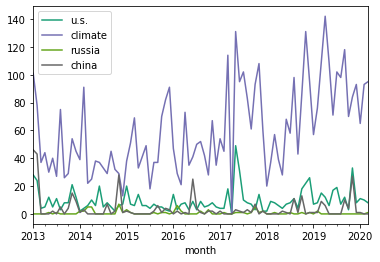

In [194]:
plot_over_time(usa_tab[['u.s.', 'climate', 'russia', 'china']])

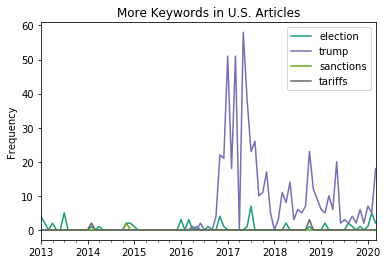

In [196]:
plot_over_time(usa_tab[['election', 'trump', 'sanctions', 'tariffs']])
plt.title('More Keywords in U.S. Articles')
plt.xlabel('')
plt.ylabel("Frequency")
plt.savefig('us_keywords2.png')

In [197]:
usa_tab.insert(8, 'snp', list(indices.snp))
usa_tab.insert(9, 'cci', list(indices.usa_conf))

In [198]:
lm_from_df(usa_tab, 'snp', 'climate')

climate = -17.865 + 0.034(snp)
P-value: 0.0
R-squared: 0.24
Standard error: 0.0


#### Russian news outlets

In [138]:
list1 = ['u.s.', 'trump', 'climate', 'election', 'sanctions', 'russia']
rus_tab = freqs_over_time(clim_rus, full_months_trans, list1)
rus_tab = rus_tab.rename(columns = {'u.s.' : 'U.S.', 'trump' : 'Trump', 'russia' : 'Russia'})

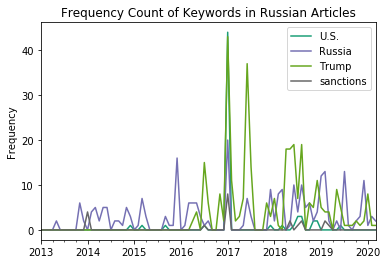

In [139]:
plot_over_time(rus_tab[['U.S.', 'Russia', 'Trump', 'sanctions']])
plt.title('Frequency Count of Keywords in Russian Articles')
plt.xlabel('')
plt.ylabel("Frequency")
plt.savefig('rus_keywords.png')

In [141]:
rus_tab.insert(6, 'wti', list(indices.wti))

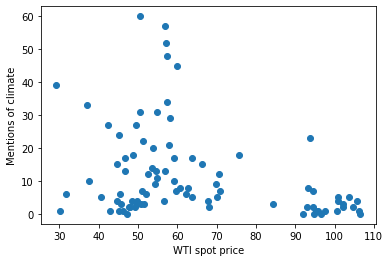

In [142]:
# Perfunctory glance at scatterplot
plt.scatter(rus_tab.wti, rus_tab.climate)
plt.xlabel('WTI spot price')
plt.ylabel('Mentions of climate')
plt.savefig('Rus_scatter')

In [143]:
lm_from_df(rus_tab, 'wti', 'climate')

climate = 25.301 + -0.207(wti)
P-value: 0.002
R-squared: 0.107
Standard error: 0.0


#### Chinese news outlets

In [176]:
list2 = ['u.s.', 'trump', 'climate', 'election', 'tariffs', 'china']
chn_tab = freqs_over_time(clim_chn, full_months_trans, list2)
chn_tab = chn_tab.rename(columns = {'u.s.' : 'U.S.', 'trump' : 'Trump', 'china' : 'China'})

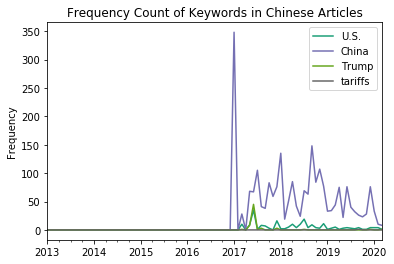

In [149]:
plot_over_time(chn_tab[['U.S.', 'China', 'Trump', 'tariffs']])
plt.title('Frequency Count of Keywords in Chinese Articles')
plt.xlabel('')
plt.ylabel("Frequency")
plt.savefig('chn_keywords.png')

In [177]:
chn_tab.insert(6, 'wti', list(indices.wti))
chn_tab.insert(7, 'sse', list(indices.sse))
chn_tab.insert(8, 'cci', list(indices['chn_conf']))

In [178]:
for predictor in ['wti', 'sse', 'cci']:
    print('')
    lm_from_df(chn_tab, predictor, 'climate')


climate = 35.94 + -0.267(wti)
P-value: 0.054
R-squared: 0.043
Standard error: 0.0

climate = 9.336 + 0.003(sse)
P-value: 0.563
R-squared: 0.004
Standard error: 0.0

climate = 1104.017 + -10.948(cci)
P-value: 0.017
R-squared: 0.065
Standard error: 4.0


In [182]:
chn_tab.insert(9, 'logged_u.s.', list(np.log(chn_tab['U.S.'])))

In [190]:
lm_from_df(chn_tab, 'wti', 'logged_u.s.')

logged_u.s. = 1.324 + -0.01(wti)
P-value: 0.031
R-squared: 0.053
Standard error: 0.0
